In [1]:
import pandas as pd
import numpy as np
import statistics
from statistics import mode
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns

### Fill the data frame

In [2]:
df = pd.read_csv("../../output/IPIP_300_AN.csv")

In [3]:
df120 = pd.read_csv("../../output/IPIP_120_AN.csv")

In [4]:
df.head(3)

,item#,Item,Sign,Key,Dimension,Facet,f_dimension,f_facet
0,i1,Worry about things.,+N1,N1,Neuroticism,Anxiety,dimension1,dimension1_facet3
1,i10,Like order.,+C2,C2,Conscientiousness,Orderliness,dimension3,dimension3_facet2
2,i100,Love order and regularity.,+C2,C2,Conscientiousness,Orderliness,dimension3,dimension3_facet2


In [5]:
def mod_dim(dim, dft):
    lis = [dft.iloc[i]['Dimension'] for i,e in dft.iterrows() if dft.iloc[i]['f_dimension'] == f'{dim}']
    try:
        return mode(lis)
    except:
        return f"Dimension not accurate enough"
    
def mod_fac(dim, dft):
    lis = [dft.iloc[i]['Facet'] for i,e in dft.iterrows() if dft.iloc[i]['f_facet'] == f'{dim}']
    try:
        return mode(lis)
    except:
        return f"Facet not accurate enough"

In [6]:
df['fa_dim'] = df['f_dimension'].apply(lambda x: mod_dim(x,df))
df['fa_facet'] = df['f_facet'].apply(lambda x: mod_dim(x,df))

In [7]:
df.drop(columns = ['f_dimension', 'f_facet'], inplace=True)

In [26]:
df.head(3)

,item#,Item,Sign,Key,Dimension,Facet,fa_dim,fa_facet,dim_error,fac_error
0,i1,Worry about things.,+N1,N1,Neuroticism,Anxiety,Neuroticism,Dimension not accurate enough,0,1
1,i10,Like order.,+C2,C2,Conscientiousness,Orderliness,Conscientiousness,Dimension not accurate enough,0,1
2,i100,Love order and regularity.,+C2,C2,Conscientiousness,Orderliness,Conscientiousness,Dimension not accurate enough,0,1


### Dimension analysis

In [9]:
def dim_err(row):
    if row['Dimension'] == row['fa_dim']:
        val = 0
    elif row['Dimension'] != row['fa_dim']:
        val = 1
    return val

def fac_err(row):
    if row['Facet'] == row['fa_facet']:
        val = 0
    elif row['Facet'] != row['fa_facet']:
        val = 1
    return val

In [10]:
df['dim_error'] = df.apply(dim_err ,axis=1)
df['fac_error'] = df.apply(fac_err ,axis=1)

In [11]:
df.head(3)

,item#,Item,Sign,Key,Dimension,Facet,fa_dim,fa_facet,dim_error,fac_error
0,i1,Worry about things.,+N1,N1,Neuroticism,Anxiety,Neuroticism,Dimension not accurate enough,0,1
1,i10,Like order.,+C2,C2,Conscientiousness,Orderliness,Conscientiousness,Dimension not accurate enough,0,1
2,i100,Love order and regularity.,+C2,C2,Conscientiousness,Orderliness,Conscientiousness,Dimension not accurate enough,0,1


In [12]:
d_error = pd.pivot_table(df, values='dim_error', index=['Dimension'], columns=['fa_dim'], aggfunc=np.sum, fill_value=0)
d_error

fa_dim,Agreeableness,Conscientiousness,Extraversion,Neuroticism,Openness
Dimension,,,,,
Agreeableness,0,1,0,2,0
Conscientiousness,4,0,0,1,3
Extraversion,2,8,0,0,0
Neuroticism,0,0,1,0,0
Openness,4,0,6,4,0


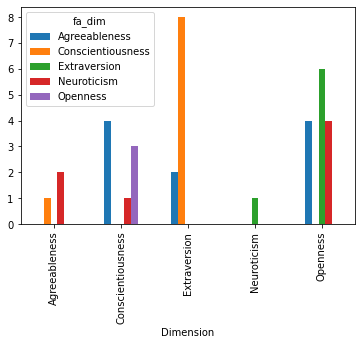

In [13]:
d_error.plot.bar()

#### Deep dive into dimension item analysis

In [14]:
def get_dim_df(df, df_err, dim):
    if dim in set(list(df['Dimension'])):
        dff = df.loc[df['Dimension'] == str(dim)].drop(columns = ['dim_error','fac_error'])
        #print(df_err.loc[dim].idxmax())
        #break
        return dff.loc[dff['fa_dim'] == df_err.loc[dim].idxmax()]
    else:
        return f'Sorry the dimension {dim} is not specified'

In [15]:
d_error.loc['Extraversion'].idxmax()


'Conscientiousness'

In [16]:
res_df = get_dim_df(df, d_error,'Agreeableness')
res_df

,item#,Item,Sign,Key,Dimension,Facet,fa_dim,fa_facet
83,i174,Think highly of myself.,-A5,A5,Agreeableness,Modesty,Neuroticism,Dimension not accurate enough
117,i204,Have a high opinion of myself.,-A5,A5,Agreeableness,Modesty,Neuroticism,Dimension not accurate enough


### Facet analysis

In [17]:
def get_fac_df(df):
    dff = df.loc[(df['fa_facet'] == 'Facet not accurate enough')]
    return dff

In [18]:
fac_error = get_fac_df(df)
#fac_error

### Item analysis

In [19]:
def get_it_df(df):
    dff = df.loc[(df['dim_error'] == 1)]
    return dff

In [23]:
it_error = get_it_df(df)
len(it_error)

36

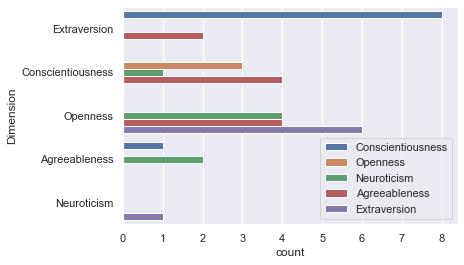

In [21]:
sns.set()
sns.countplot(y='Dimension', hue='fa_dim', data=it_error, palette="deep")
plt.legend(loc='lower right')

In [22]:
dims[1]

NameError: name 'dims' is not defined

In [ ]:
dims = list(set(list(df['Dimension'])))

In [ ]:
res_df = {i:get_dim_df(df, d_error,f'{i}') for i in dims}

In [ ]:
res_df['Extraversion']